# Predicting Access to Higher Education
By: Yarden, Brandon, and Tommy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [3]:
df = pd.read_csv('Sample ACS 2021 for LMU.csv', encoding='latin1')

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_31624/4116541352.py:1: DtypeWarning: Columns (5,15,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Sample ACS 2021 for LMU.csv', encoding='latin1')


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data Quality Analysis

Data quality analysis blah blah blah

In [5]:
df.head(10)

,REGION,STATEFIP,PERWT,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,CITIZEN,YRNATUR,LANGUAGE,LANGUAGED,SPEAKENG,EDUC,EDUCD,DEGFIELD,DEGFIELDD,DEGFIELD2,DEGFIELD2D,EMPSTAT,EMPSTATD,CLASSWKR,CLASSWKRD,OCCSOC,IND,WKSWORK1,UHRSWORK,INCTOT,INCWAGE,INCINVST,INCOTHER,INCEARN,TRANWORK,TRANTIME,DEPARTS,ARRIVES
0,East South Central Div.,Alabama,48.0,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",399041,7870,52,40,6300,6300,0,0,6300,"Auto, truck, or van",5,1915,1909
1,East South Central Div.,Alabama,9.0,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,Regular high school diploma,NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",537051,6390,52,40,40600,40600,0,0,40600,"Auto, truck, or van",5,802,809
2,East South Central Div.,Alabama,46.0,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,State govt employee,412010,5391,52,41,6000,6000,0,0,6000,"Auto, truck, or van",25,532,559
3,East South Central Div.,Alabama,54.0,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",1 year of college,"1 or more years of college credit, no degree",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",399041,7870,52,40,6300,6300,0,0,6300,"Auto, truck, or van",5,1915,1909
4,East South Central Div.,Alabama,42.0,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,"Wage/salary, private",352010,8680,52,35,26400,26400,0,0,26400,Walked only,3,1455,1459
5,East South Central Div.,Alabama,61.0,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,State govt employee,412010,5391,52,41,6000,6000,0,0,6000,"Auto, truck, or van",25,532,559
6,East South Central Div.,Alabama,3.0,0 children present,Male,39,Never married/single,Not Applicable,White,White,Missouri,Missouri,Not Reported,Not Reported,NaN,NaN,English,English,"Yes, speaks only English",5+ years of college,Master's degree,Theology and Religious Vocations,Theology and Religious Vocations,NaN,NaN,Employed,At work,Works for wages,Wage/salary at non-profit,212011,9160,52,70,34000,31500,2500,0,31500,Walked only,5,847,854
7,East South Central Div.,Alabama,38.0,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",NaN,NaN,English,English,"Yes, speaks only English",Grade 12,"Some college, but less than 1 year",NaN,NaN,NaN,NaN,Employed,At work,Works for wages,State govt employee,412010,5391,52,41,6000,6000,0,0,6000,"Auto

In [6]:
cat_vars = df.select_dtypes(include='object')
cat_summary = pd.DataFrame({
    'Cardinality': cat_vars.nunique(),
    'Mode': cat_vars.mode().iloc[0],
    'Frequency': cat_vars.apply(lambda x: x.value_counts().iloc[0]),
    'Missing (%)': cat_vars.isnull().mean() * 100
})

In [7]:
cat_summary

,Cardinality,Mode,Frequency,Missing (%)
REGION,9,South Atlantic Division,100188,0.000000
STATEFIP,51,California,57369,0.000000
NCHILD,10,0 children present,276522,0.000000
SEX,2,Male,281131,0.000000
AGE,158,50,10038,0.000000
MARST,6,"Married, spouse present",294029,0.000000
MARRNO,4,Married once,294310,0.000000
RACE,9,White,341672,0.000000
RACED,139,White,341672,0.000000
BPL,123,California,41016,0.000000


Large amount of missing values for DEGFIELD2, DEGFIELD2D, DEGFIELDD, DEGFIELD, YRNATUR, and CITIZEN. Will consider dropping these, especially considering the degree field columns would present data leakage issues.

In [8]:
cont_vars = df.select_dtypes(include=['int64', 'float64'])
cont_summary = cont_vars.describe().T
cont_summary['Missing (%)'] = cont_vars.isnull().mean() * 100

In [9]:
cont_summary

,count,mean,std,min,25%,50%,75%,max,Missing (%)
PERWT,502363.0,107.669132,92.227745,1.0,53.0,81.0,131.0,2471.0,0.0
IND,502363.0,6175.757974,2667.678290,170.0,4580.0,7270.0,8090.0,9590.0,0.0
WKSWORK1,502363.0,51.980297,0.190678,50.0,52.0,52.0,52.0,52.0,0.0
INCTOT,502363.0,80917.390530,87420.436979,-9500.0,36000.0,58000.0,92500.0,1487400.0,0.0
INCWAGE,502363.0,73129.947046,78261.462905,0.0,33000.0,53000.0,86000.0,787000.0,0.0
INCINVST,502363.0,1772.900739,17421.416029,-6300.0,0.0,0.0,0.0,522000.0,0.0
INCOTHER,502363.0,352.587153,2869.488204,0.0,0.0,0.0,0.0,76000.0,0.0
TRANTIME,502363.0,21.224226,22.362510,0.0,5.0,15.0,30.0,163.0,0.0
DEPARTS,502363.0,627.603430,433.007743,0.0,502.0,702.0,802.0,2345.0,0.0
ARRIVES,502363.0,657.883620,442.539338,0.0,519.0,719.0,824.0,2359.0,0.0


Not too much to note from our continous variable data quality report besides the lack of missing values which makes our job a little easier. Next let's visualize these to see our outliers.

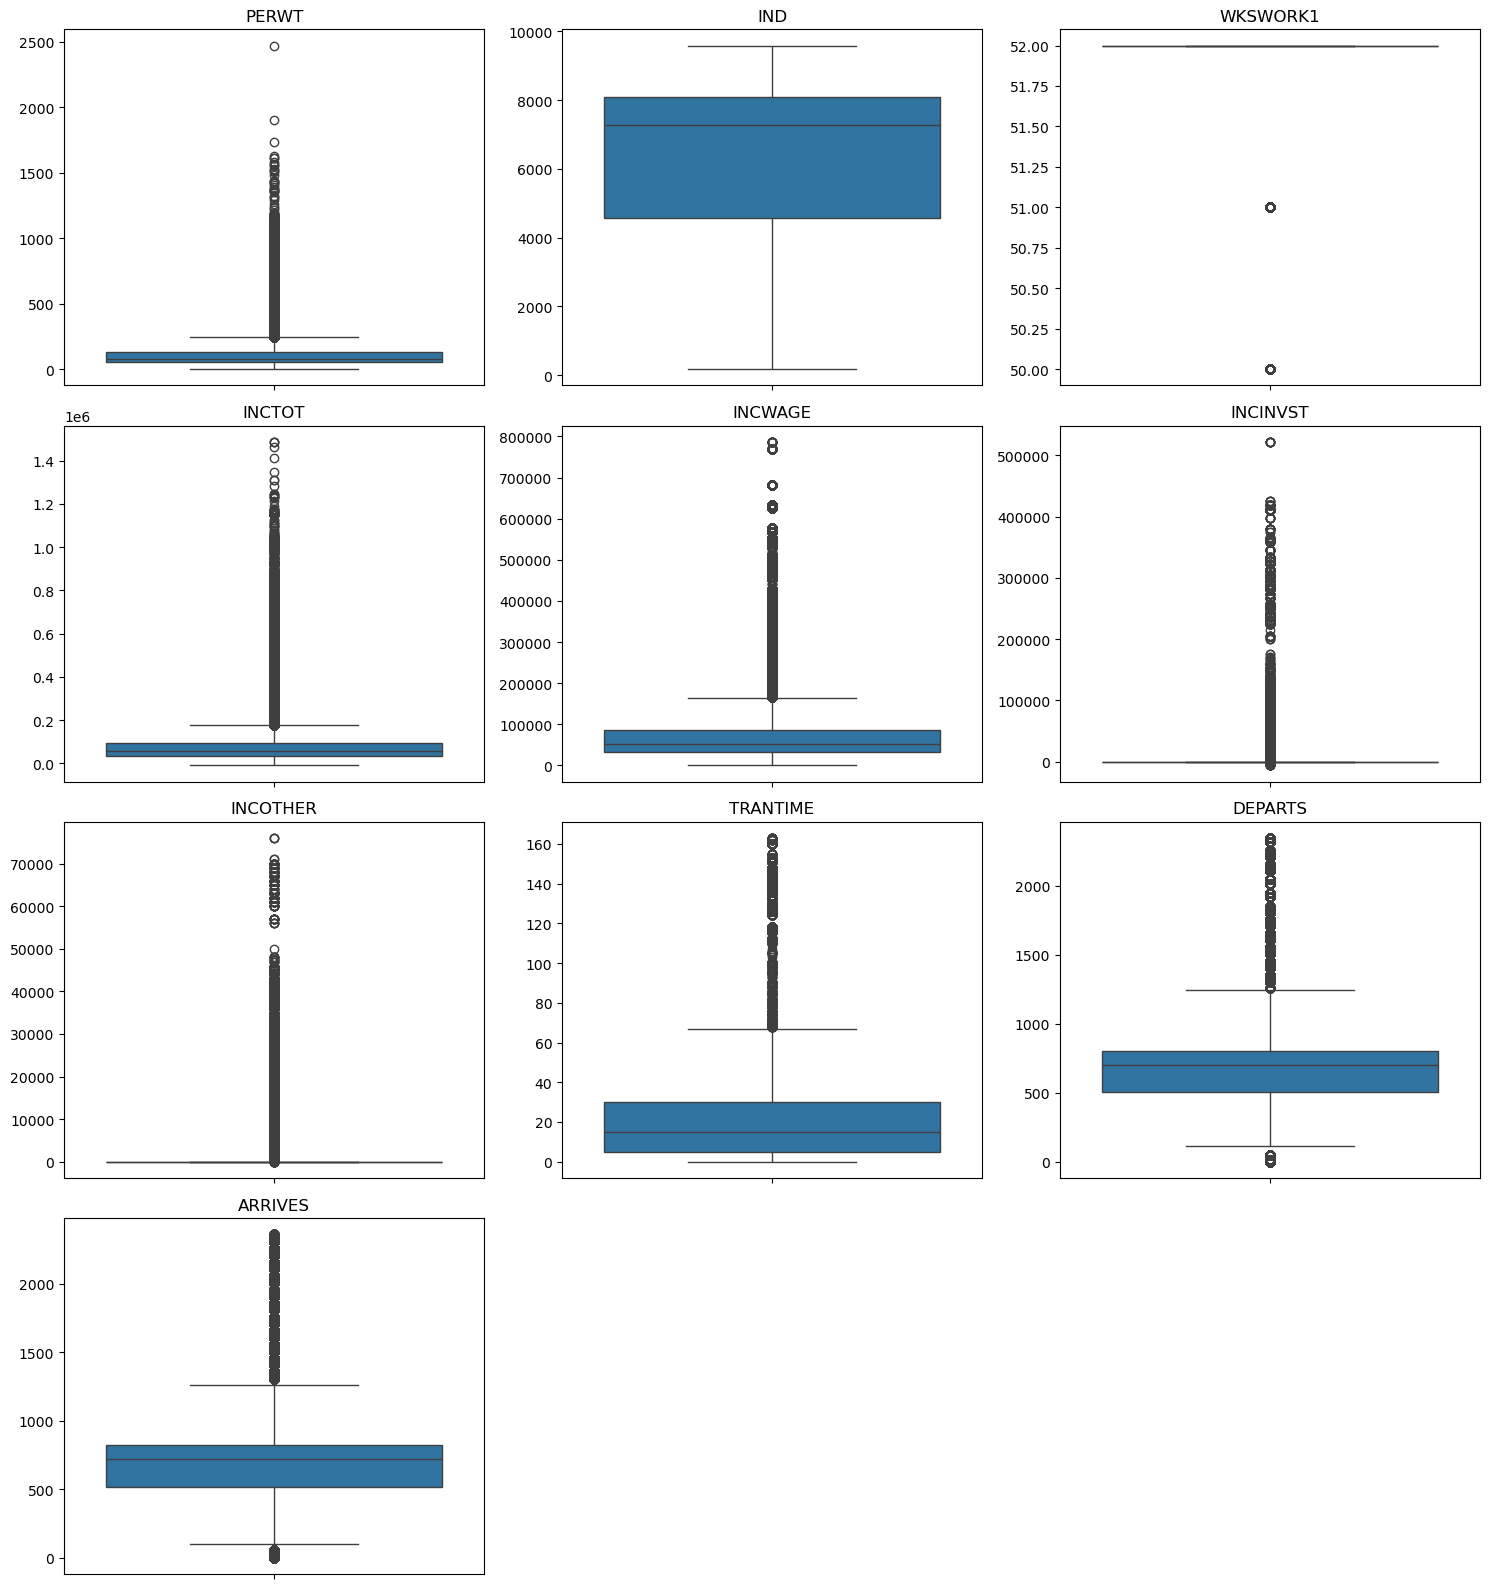

In [10]:
# Determine grid size
n_vars = len(cont_vars.columns)
n_cols = 3  # You can adjust this number
n_rows = math.ceil(n_vars / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create box plots
for i, col in enumerate(cont_vars.columns):
    sns.boxplot(y=cont_vars[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('')

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_30525/1299978886.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_30525/1299978886.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_30525/1299978886.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
/var/folders/6n/97802hfn6rq181k5lvy7kl_40000gn/T/ipykernel_30525/1299978886.py:43: UserWarning: set_ticklabels() should only be us

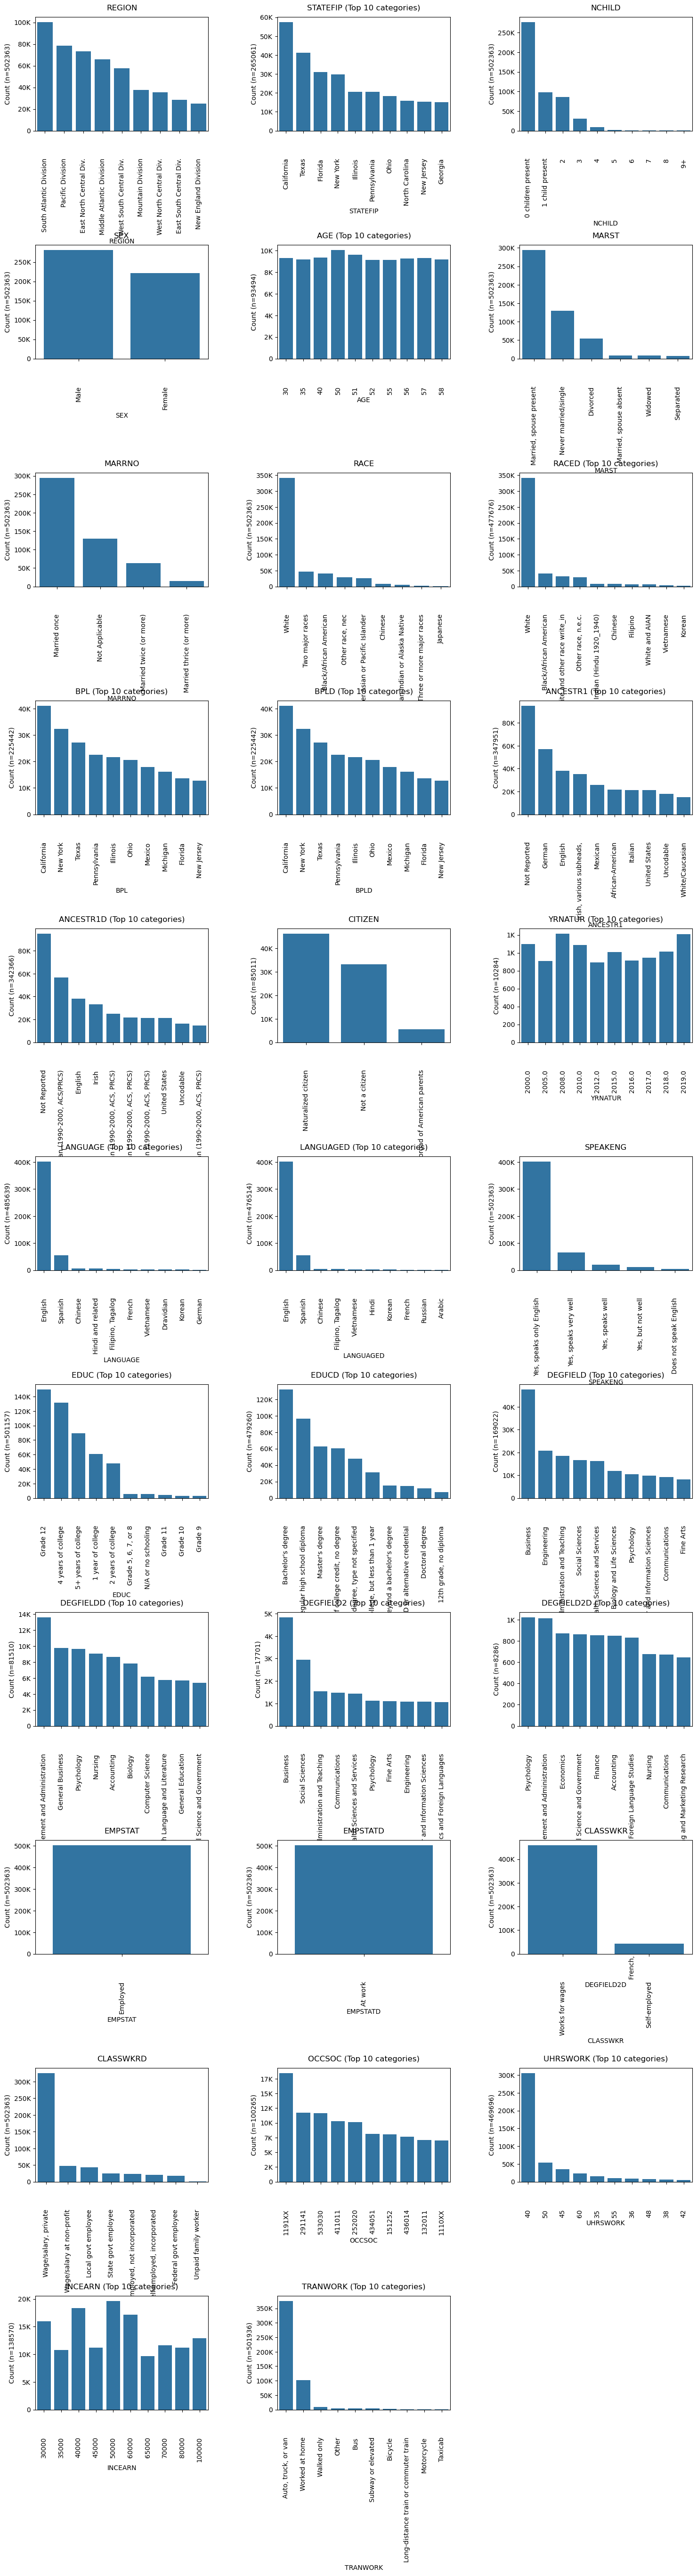

In [11]:
# Assuming df is your dataframe
# Filter categorical columns (those not in cont_vars)
cat_cols = [col for col in df.columns if col not in cont_vars.columns]

# Determine grid size
n_cats = len(cat_cols)
n_cols = 3  # You can adjust this number
n_rows = math.ceil(n_cats / n_cols)

# Create figure with more height to accommodate long labels
fig = plt.figure(figsize=(18, n_rows * 6))  # Increased height

# Set up the subplots with explicitly defined spacing
gs = fig.add_gridspec(n_rows, n_cols, hspace=1.0, wspace=0.4)
axes = []

# Create axes with the gridspec
for i in range(n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes.append(fig.add_subplot(gs[row, col]))

# Create bar plots for each categorical variable
for i, col in enumerate(cat_cols):
    if i >= len(axes):
        break

    # Get value counts and sort by frequency
    counts = df[col].value_counts().sort_values(ascending=False)

    # For variables with many categories, limit to top 10
    if len(counts) > 10:
        counts = counts.head(10)
        title = f"{col} (Top 10 categories)"
    else:
        title = col

    # Create bar plot
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    axes[i].set_title(title, fontsize=12, pad=10)

    # Rotate x-labels and set position to avoid cutting off
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')

    # Format y-axis to show thousands with K
    if max(counts) > 1000:
        from matplotlib.ticker import FuncFormatter
        axes[i].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K' if x >= 1000 else f'{int(x)}'))

    # Show category counts in the y-axis label
    axes[i].set_ylabel(f'Count (n={sum(counts)})')

    # Add bottom margin to make room for labels
    plt.setp(axes[i].get_xticklabels(), y=-0.2)

# Hide unused subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

A couple things to note. First, region has a fairly high cardinality with some regions not containing that many people. We may consider binning this feature if we face overfitting issues. The same goes for state where we may opt for using region instead if it causes problems. The ages range quite a bit and thus will need to binned.

Let's create a function to compare some of our similar columns like RACE and RACED, BPL and BPLD, and LANGUAGE and LANGUAGED

In [12]:
def compare_columns(df, col1, col2):
    # Row-wise comparison
    are_equal = df[col1] == df[col2]
    all_rows_equal = are_equal.all()

    print(f"Are all rows identical between '{col1}' and '{col2}'? {all_rows_equal}")
    print(f"Number of rows where values differ: {(~are_equal).sum()}")

    # Sample differing rows
    if not all_rows_equal:
        print("\nSample rows where values differ:")
        print(df.loc[~are_equal, [col1, col2]].head())

    # Set comparison of unique values
    values1 = set(df[col1].dropna().unique())
    values2 = set(df[col2].dropna().unique())

    print(f"\nUnique values in '{col1}': {values1}")
    print(f"Unique values in '{col2}': {values2}")
    print(f"Do they contain the same unique values? {values1 == values2}")

    if values1 != values2:
        print(f"Values in '{col1}' but not in '{col2}': {values1 - values2}")
        print(f"Values in '{col2}' but not in '{col1}': {values2 - values1}")

In [13]:
compare_columns(df, 'RACE', 'RACED')

Are all rows identical between 'RACE' and 'RACED'? False
Number of rows where values differ: 110995

Sample rows where values differ:
               RACE                          RACED
13  Two major races                White and Black
20  Two major races  White and other race write_in
26  Other race, nec             Other race, n.e.c.
27  Other race, nec             Other race, n.e.c.
48  Two major races             White and Filipino

Unique values in 'RACE': {'Black/African American', 'Chinese', 'Japanese', 'American Indian or Alaska Native', 'Other race, nec', 'Other Asian or Pacific Islander', 'Three or more major races', 'Two major races', 'White'}
Unique values in 'RACED': {'Malaysian', 'Black and other PI race(s)', 'Hopi', 'White and Samoan', 'Filipino and Hawaiian', 'White, AIAN, Asian', 'White, Japanese, Hawaiian (2000 1%)', 'Pacific Islander, n.s.', 'Chinese, Filipino, Hawaiian (2000 1%)', 'Sioux', 'AIAN and Filipino (2000 1%)', 'Black and Japanese', 'White and Black', 'Japa

In [14]:
compare_columns(df, 'BPL', 'BPLD')

Are all rows identical between 'BPL' and 'BPLD'? False
Number of rows where values differ: 27174

Sample rows where values differ:
                   BPL                BPLD
144        West Indies  Dominican Republic
152    Central America         El Salvador
218      SOUTH AMERICA            Colombia
312      SOUTH AMERICA            Colombia
334  Other USSR/Russia             Ukraine

Unique values in 'BPL': {'Michigan', 'Georgia', 'Mississippi', 'Yugoslavia', 'India', 'Hungary', 'Lebanon', 'Scotland', 'Czechoslovakia', 'Maine', 'U.S. Virgin Islands', 'Massachusetts', 'Netherlands', 'Mexico', 'Korea', 'Malaysia', 'Louisiana', 'South Dakota', 'Sweden', 'Pennsylvania', 'Virginia', 'Afghanistan', 'Bulgaria', 'American Samoa', 'Austria', 'Vietnam', 'New York', 'Utah', 'Arizona', 'Alaska', 'Nepal', 'West Indies', 'Jordan', 'Vermont', 'Iceland', 'New Hampshire', 'Kansas', 'Australia and New Zealand', 'Delaware', 'SOUTH AMERICA', 'Iran', 'North Carolina', 'Ohio', 'Singapore', 'Yemen Arab Re

In [15]:
compare_columns(df, 'ANCESTR1', 'ANCESTR1D')

Are all rows identical between 'ANCESTR1' and 'ANCESTR1D'? False
Number of rows where values differ: 210440

Sample rows where values differ:
           ANCESTR1                                ANCESTR1D
0  African-American  African-American (1990-2000, ACS, PRCS)
1  African-American  African-American (1990-2000, ACS, PRCS)
2  African-American  African-American (1990-2000, ACS, PRCS)
3  African-American  African-American (1990-2000, ACS, PRCS)
4  African-American  African-American (1990-2000, ACS, PRCS)

Unique values in 'ANCESTR1': {'Malaysian', 'Finnish', 'Tibetan', 'Zimbabwean', 'Alsatian, Alsace-Lorraine', 'British Virgin Islander', 'French Canadian', 'Salvadoran', 'Not Reported', 'Saudi Arabian', 'Sudanese', 'Guinean', 'Albanian', 'Middle Eastern', 'Belgian', 'Basque', 'Japanese', 'Nigerian', 'Kurdish', 'Guyanese/British Guiana', 'Chilean', 'Nepali', 'Serbian', 'Chamorro Islander', 'Spanish American', 'Thai', 'Afghan', 'Belizean', 'Haitian', 'Eastern European, nec', 'Danish', 'Egyp

In [16]:
compare_columns(df, 'LANGUAGE', 'LANGUAGED')

Are all rows identical between 'LANGUAGE' and 'LANGUAGED'? False
Number of rows where values differ: 17297

Sample rows where values differ:
                   LANGUAGE LANGUAGED
62                Dravidian    Telugu
169       Hindi and related     Hindi
404  Other Persian dialects   Kurdish
405  Other Persian dialects   Kurdish
408       Hindi and related     Hindi

Unique values in 'LANGUAGE': {'Finnish', 'Dravidian', 'Tibetan', 'Russian', 'Magyar, Hungarian', 'Greek', 'Arabic', 'Other Balto-Slavic', 'Swedish', 'Turkish', 'Yiddish, Jewish', 'Native', 'Norwegian', 'Vietnamese', 'Indonesian', 'Aztecan, Nahuatl, Uto-Aztecan', 'Hamitic', 'Albanian', 'Japanese', 'Chinese', 'Other Persian dialects', 'Portuguese', 'Aleut, Eskimo', 'German', 'Hebrew, Israeli', 'Spanish', 'Ukrainian, Ruthenian, Little Russian', 'Dutch', 'Thai, Siamese, Lao', 'English', 'Algonquian', 'Muskogean', 'Polish', 'Rumanian', 'Near East Arabic dialect', 'Burmese, Lisu, Lolo', 'Celtic', 'Serbo-Croatian, Yugoslavian, Sl

It seems that BPL is essentially a more distilled version of BPLD so we'll probablly drop the latter. However, BPL still has high cardinality and may have to be binned.

## Data Cleaning

In [9]:
# First getting rid of columns that have a high percentage of missing values
# Also getting rid of columns irrelevant to our analysis

drop_col = ['CITIZEN', 'YRNATUR', 'DEGFIELD', 'DEGFIELDD', 'DEGFIELD2',
            'DEGFIELD2D', 'PERWT', 'EDUC', 'EMPSTAT', 'EMPSTATD', 'CLASSWKR', 'CLASSWKRD',
            'OCCSOC', 'UHRSWORK', 'INCEARN', 'TRANWORK', 'IND', 'WKSWORK1',
            'INCTOT', 'INCWAGE', 'INCINVST', 'INCOTHER','TRANTIME', 'DEPARTS', 'ARRIVES']
# Keeping EDUCD over EDUC


In [10]:
df_subset = df.drop(drop_col, axis=1)

In [11]:
df_subset[df_subset['RACE'] == 'Two major races']['RACED'].unique()

array(['White and Black', 'White and other race write_in',
       'White and Filipino', 'Black and other race write_in',
       'White and PI write_in', 'White and AIAN',
       'AIAN and other race write_in', 'White and Japanese',
       'Black and AIAN', 'White and other Asian race(s)',
       'White and Korean', 'Black and Asian Indian',
       'Filipino and other race write_in', 'White and Samoan',
       'White and Native Hawaiian', 'Black and Filipino',
       'Black and Japanese', 'White and Vietnamese', 'White and Chinese',
       'AIAN and Filipino (2000 1%)', 'Black and other PI race(s)',
       'White and Asian Indian', 'Asian write_in and other race write_in',
       'Filipino and Hawaiian', 'Black and other Asian race(s)',
       'White and Chamorro', 'Black and Chinese',
       'Black and Asian write_in', 'Filipino and PI write_in',
       'Chinese, Filipino, Hawaiian (2000 1%)',
       'Native Hawaiian or PI other race(s)',
       'PI and other race write_in:', 'Japanese

In [12]:
df_subset['RACE'].value_counts()

RACE
White                               341672
Two major races                      47348
Black/African American               40424
Other race, nec                      28744
Other Asian or Pacific Islander      26161
Chinese                               8486
American Indian or Alaska Native      5131
Three or more major races             3027
Japanese                              1370
Name: count, dtype: int64

In [13]:
def simplify_race_categories(race):
    if pd.isnull(race):
        return None

    # Handle biracial categories
    if race in ["Two major races", "Three or more major races"]:
        return "Biracial"

    # Combine Asian/Pacific Islander categories
    elif race in ["Chinese", "Japanese", "Other Asian or Pacific Islander"]:
        return "Asian or Pacific Islander"

    # Rename "Other race, nec" to "Other"
    elif race == "Other race, nec":
        return "Other"

    # Keep the rest as is
    else:
        return race

# Apply the mapping to your RACE column
df_subset['SimplifiedRace'] = df['RACE'].apply(simplify_race_categories)

# Check the results
simplified_counts = df_subset['SimplifiedRace'].value_counts()
print(simplified_counts)

SimplifiedRace
White                               341672
Biracial                             50375
Black/African American               40424
Asian or Pacific Islander            36017
Other                                28744
American Indian or Alaska Native      5131
Name: count, dtype: int64


In [14]:
df_subset.head(10)

,REGION,STATEFIP,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,LANGUAGE,LANGUAGED,SPEAKENG,EDUCD,SimplifiedRace
0,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American
1,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American
2,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American
3,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American
4,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American
5,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American
6,East South Central Div.,Alabama,0 children present,Male,39,Never married/single,Not Applicable,White,White,Missouri,Missouri,Not Reported,Not Reported,English,English,"Yes, speaks only English",Master's degree,White
7,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American
8,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American
9,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American


In [15]:
# handling number of children, cleaning so it's just an integer

df_subset['NCHILD'].value_counts()

NCHILD
0 children present    276522
1 child present        97427
2                      86119
3                      30492
4                       8497
5                       2199
6                        669
7                        226
8                        110
9+                       102
Name: count, dtype: int64

Because NCHILD is right skewed, we'll bin the values above 5 children.

In [16]:
# 5 will be representative of 5+ children
def clean_nchild_grouped(value):
    if isinstance(value, str):
        if "child" in value:
            try:
                num = int(value.split()[0])
            except ValueError:
                return None
        elif value == "9+":
            num = 9
        else:
            try:
                num = int(value)
            except ValueError:
                return None
    else:
        num = value

    if num >= 5:
        return 5
    return num

In [17]:
df_subset['NCHILD_CLEANED'] = df_subset['NCHILD'].apply(clean_nchild_grouped)


In [18]:
df_subset['NCHILD_CLEANED'].value_counts()

NCHILD_CLEANED
0    276522
1     97427
2     86119
3     30492
4      8497
5      3306
Name: count, dtype: int64

In [19]:
df_subset.head(10)

,REGION,STATEFIP,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,LANGUAGE,LANGUAGED,SPEAKENG,EDUCD,SimplifiedRace,NCHILD_CLEANED
0,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0
1,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American,0
2,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0
3,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0
4,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0
5,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0
6,East South Central Div.,Alabama,0 children present,Male,39,Never married/single,Not Applicable,White,White,Missouri,Missouri,Not Reported,Not Reported,English,English,"Yes, speaks only English",Master's degree,White,0
7,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0
8,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American,0
9,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0


Next we'll working on binning Age. It's a messy column with some non-numerical values and duplicate counts of the same number as seen below. We'll clean the column up and bin the values to the following lay out:

##### Teen: 16–19
##### Young Adult: 20–29
##### Adult:	30–44
##### Middle-Aged Adult:	45–59
##### Senior:	60–74
##### Elderly:	75+

In [20]:
df_subset['AGE'].value_counts()

AGE
50                           10038
51                            9599
40                            9352
57                            9307
30                            9299
56                            9268
58                            9187
35                            9169
55                            9140
52                            9135
49                            9094
39                            9088
37                            9062
32                            9034
31                            9013
59                            9010
36                            9004
38                            8975
54                            8974
53                            8966
33                            8966
41                            8957
34                            8900
48                            8832
60                            8757
43                            8720
42                            8715
44                            8672
45              

In [21]:
# First, clean the "90 (90+...)" weird value
df_subset['AGE_CLEAN'] = df_subset['AGE'].replace({'90 (90+ in 1980 and 1990)': 90}).astype(int)

# Then, bin into broader age groups
def bin_age(age):
    if age < 20:
        return 'Teen'
    elif age < 30:
        return 'Young Adult'
    elif age < 45:
        return 'Adult'
    elif age < 60:
        return 'Middle-Aged Adult'
    elif age < 75:
        return 'Senior'
    else:
        return 'Elderly'

# Apply binning
df_subset['AGE_BINNED'] = df_subset['AGE_CLEAN'].apply(bin_age)

In [22]:
df_subset['MARRNO'].value_counts()

MARRNO
Married once                294310
Not Applicable              129511
Married twice (or more)      63729
Married thrice (or more)     14813
Name: count, dtype: int64

Now we'll handle the marriage number column, waiting to see how we're going to handle marriage status.

In [23]:
# Map text values to numbers
marrno_mapping = {
    'Married once': 1,
    'Married twice (or more)': 2,
    'Married thrice (or more)': 3,
    'Not Applicable': 0  # Or you could set to np.nan if you prefer
}

# Apply mapping
df_subset['MARRNO_CLEAN'] = df_subset['MARRNO'].map(marrno_mapping)

In [24]:
df_subset.head(10)

,REGION,STATEFIP,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,LANGUAGE,LANGUAGED,SPEAKENG,EDUCD,SimplifiedRace,NCHILD_CLEANED,AGE_CLEAN,AGE_BINNED,MARRNO_CLEAN
0,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0,20,Young Adult,0
1,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American,0,52,Middle-Aged Adult,0
2,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0
3,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0,20,Young Adult,0
4,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0
5,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0
6,East South Central Div.,Alabama,0 children present,Male,39,Never married/single,Not Applicable,White,White,Missouri,Missouri,Not Reported,Not Reported,English,English,"Yes, speaks only English",Master's degree,White,0,39,Adult,0
7,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0
8,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American,0,52,Middle-Aged Adult,0
9,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0


In [25]:
df_subset['BPL'].value_counts()

BPL
California                     41016
New York                       32309
Texas                          27198
Pennsylvania                   22471
Illinois                       21640
Ohio                           20596
Mexico                         17814
Michigan                       16123
Florida                        13625
New Jersey                     12650
Massachusetts                  10958
Indiana                        10765
North Carolina                 10003
Wisconsin                       9879
Georgia                         9713
Missouri                        9505
Minnesota                       9448
Virginia                        9442
India                           8365
Tennessee                       7914
Washington                      7125
Maryland                        7056
Louisiana                       6895
Alabama                         6606
Iowa                            6482
SOUTH AMERICA                   6380
Kentucky                        62

In [26]:
# Define thresholds
state_level_threshold = 5000  # Keep big US states separate
country_threshold = 1000      # Keep big countries separate

# Full list of U.S. states (for reference)
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
    'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia',
    'Wisconsin', 'Wyoming'
]

# Top U.S. states to keep separate
top_us_states = [
    'California', 'New York', 'Texas', 'Pennsylvania', 'Illinois', 'Ohio',
    'Michigan', 'Florida', 'New Jersey', 'Massachusetts', 'Indiana',
    'North Carolina', 'Wisconsin', 'Georgia', 'Missouri', 'Minnesota',
    'Virginia', 'Tennessee', 'Washington', 'Maryland', 'Louisiana', 'Alabama', 'Iowa',
    'Kentucky', 'Colorado', 'Connecticut', 'South Carolina', 'Arizona', 'Oklahoma', 'Kansas'
]

# Large countries
large_countries = ['Mexico', 'India', 'China', 'Philippines']

# Large regions
large_regions = ['SOUTH AMERICA', 'Central America', 'AFRICA', 'West Indies']

# U.S. Territories
territories = ['Puerto Rico', 'Guam', 'U.S. Virgin Islands', 'American Samoa', 'District of Columbia']

# Define binning function
def bin_bpl(value):
    if value in top_us_states:
        return value
    elif value in us_states:
        return 'Other US State'
    elif value in large_countries:
        return value
    elif value in large_regions:
        return value
    elif value in territories:
        return 'US Territories'
    else:
        return 'Other International'

# Apply
df_subset['BPL_BINNED'] = df_subset['BPL'].apply(bin_bpl)


In [27]:
df_subset['BPL'].value_counts()

BPL
California                     41016
New York                       32309
Texas                          27198
Pennsylvania                   22471
Illinois                       21640
Ohio                           20596
Mexico                         17814
Michigan                       16123
Florida                        13625
New Jersey                     12650
Massachusetts                  10958
Indiana                        10765
North Carolina                 10003
Wisconsin                       9879
Georgia                         9713
Missouri                        9505
Minnesota                       9448
Virginia                        9442
India                           8365
Tennessee                       7914
Washington                      7125
Maryland                        7056
Louisiana                       6895
Alabama                         6606
Iowa                            6482
SOUTH AMERICA                   6380
Kentucky                        62

In [28]:
# List of U.S. states and territories
us_places = [
    "California", "New York", "Texas", "Pennsylvania", "Illinois", "Ohio", "Michigan", "Florida",
    "New Jersey", "Massachusetts", "Indiana", "North Carolina", "Wisconsin", "Georgia", "Missouri",
    "Minnesota", "Virginia", "Tennessee", "Washington", "Maryland", "Louisiana", "Alabama", "Iowa",
    "Kentucky", "Colorado", "Connecticut", "South Carolina", "Arizona", "Oklahoma", "Kansas",
    "Mississippi", "Oregon", "Utah", "Arkansas", "Nebraska", "West Virginia", "New Mexico",
    "District of Columbia", "Hawaii", "Maine", "Idaho", "Rhode Island", "South Dakota",
    "North Dakota", "New Hampshire", "Montana", "Nevada", "Delaware", "Vermont", "Wyoming",
    "Alaska", "Puerto Rico", "Guam", "U.S. Virgin Islands", "American Samoa"
]

# Function to map BPL values
def simplify_bpl(bpl_value):
    if bpl_value in us_places:
        return "United States"
    else:
        return "Outside United States"

# Apply to your DataFrame (assuming your column is called 'BPL')
df_subset['BPL_Simplified'] = df_subset['BPL'].apply(simplify_bpl)

In [29]:
df_subset.head()

,REGION,STATEFIP,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,LANGUAGE,LANGUAGED,SPEAKENG,EDUCD,SimplifiedRace,NCHILD_CLEANED,AGE_CLEAN,AGE_BINNED,MARRNO_CLEAN,BPL_BINNED,BPL_Simplified
0,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0,20,Young Adult,0,Georgia,United States
1,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American,0,52,Middle-Aged Adult,0,Alabama,United States
2,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0,Alabama,United States
3,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0,20,Young Adult,0,Georgia,United States
4,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0,Florida,United States


In [30]:
df['ANCESTR1'].value_counts()

ANCESTR1
Not Reported                     94826
German                           57072
English                          37901
Irish, various subheads,         35311
Mexican                          25670
African-American                 21800
Italian                          21367
United States                    21113
Uncodable                        17930
White/Caucasian                  14961
Polish                            9843
European, nec                     6813
Asian Indian                      6674
Chinese                           6672
French                            6050
Scottish                          5920
Filipino                          5515
American Indian  (all tribes)     5090
Norwegian                         4823
Hispanic                          4161
Afro-American                     3490
Mexican American                  3478
Puerto Rican                      3460
Swedish                           3204
Dutch                             3079
Scotch Irish    

In [31]:
(len(df_subset[df_subset['ANCESTR1'] == 'Not Reported']) + len(df_subset[df_subset['ANCESTR1'] == 'Uncodable']))/len(df_subset)

0.22445124342358017

22% of our ANCESTR1 column contains the values "Not Reported" or "Uncodable". If we want to include this column in our final model and have our user input their ancestry, including an option like this wouldn't have the final prediction reflect on their background but rather how they decided to fill out the survey.

In [32]:
def rebin_ancestry_from_value(value):
    val = str(value).lower().strip()

    if val == 'not reported':
        return 'Not Reported'
    elif val == 'uncodable':
        return 'Not Reported'
    elif val in ['german', 'english', 'irish, various subheads,', 'french', 'scottish', 'dutch', 'welsh', 'swedish', 'norwegian', 'finnish', 'danish', 'swiss', 'british', 'british isles']:
        return 'Western European'
    elif val in ['italian', 'polish', 'russian', 'spanish', 'portuguese', 'french canadian', 'greek', 'eastern european, nec', 'ukrainian', 'hungarian', 'czechoslovakian', 'slovak', 'romanian', 'lithuanian', 'austrian', 'croatian', 'serbian', 'slovene', 'bulgarian', 'belgian', 'armenian', 'moldavian', 'albanian', 'belorussian', 'central european, nec']:
        return 'Southern/Eastern Euro'
    elif val in ['mexican', 'mexican american', 'puerto rican', 'cuban', 'salvadoran', 'dominican', 'latin american', 'honduran', 'ecuadorian', 'peruvian', 'colombian', 'argentinean', 'costa rican', 'panamanian', 'chilean', 'nicaraguan', 'guatemalan', 'venezuelan', 'nuevo mexicano', 'spanish american', 'chicano/chicana', 'uruguayan']:
        return 'Latino/Hispanic'
    elif val in ['african-american', 'afro-american', 'african', 'haitian', 'nigerian', 'jamaican', 'ethiopian', 'ghanian', 'liberian', 'cape verdean', 'west indian', 'south african', 'somalian', 'other subsaharan africa', 'congolese', 'senegalese', 'kenyan', 'sudanese', 'eritrean', 'sierra leonean', 'gambian', 'west african']:
        return 'African/Caribbean'
    elif val in ['asian indian', 'chinese', 'filipino', 'vietnamese', 'korean', 'japanese', 'asian', 'taiwanese', 'thai', 'cambodian', 'bengali', 'burmese', 'laotian', 'pakistani', 'sri lankan', 'hmong', 'other asian', 'indonesian', 'afghan', 'malaysian', 'pacific islander', 'samoan', 'guamanian', 'fijian', 'micronesian', 'chamorro islander', 'marshall islander', 'okinawan', 'polynesian', 'other pacific']:
        return 'Asian/Pacific Islander'
    elif val in ['american indian (all tribes)', 'central american indian', 'south american indian', 'eskimo']:
        return 'Indigenous/Native American'
    elif val in ['iranian', 'lebanese', 'egyptian', 'iraqi', 'israeli', 'syrian', 'palestinian', 'arab', 'moroccan', 'jordanian', 'algerian', 'libyan', 'other arab', 'middle eastern', 'north african']:
        return 'Middle Eastern/North African'
    else:
        return 'Other/Unknown'


In [33]:
df_subset['ANCESTRY_REBINNED'] = df_subset['ANCESTR1'].apply(rebin_ancestry_from_value)

After testing out mutliple imputation methods including a deep encoder and random forest, it doesn't seem like there's a highly accurate way of imputing this variable. We will continue without this column. However, if we do need to include it we may have to drop those rows that are labeled Not Reported or Uncodable.

In [34]:
df_subset['LANGUAGE'].value_counts()

LANGUAGE
English                                   401530
Spanish                                    55326
Chinese                                     6864
Hindi and related                           5717
Filipino, Tagalog                           4310
French                                      2953
Vietnamese                                  2763
Dravidian                                   2512
Korean                                      1902
German                                      1762
Russian                                     1694
Portuguese                                  1525
Arabic                                      1521
Sub-Saharan Africa                          1215
Polish                                       912
Italian                                      839
Persian, Iranian, Farsi                      743
Japanese                                     733
Thai, Siamese, Lao                           569
Serbo-Croatian, Yugoslavian, Slavonian       470
Tibetan    

In [35]:
df_subset['SPEAKENG'].value_counts()

SPEAKENG
Yes, speaks only English    401307
Yes, speaks very well        65853
Yes, speaks well             20526
Yes, but not well            10909
Does not speak English        3768
Name: count, dtype: int64

Here we're treating SPEAKENG as ordinal as there is a natural order from fluency to does not speak english.

In [36]:
def encode_speakeng(value):
    value = str(value).lower().strip()
    if value == 'yes, speaks only english':
        return 0
    elif value == 'yes, speaks very well':
        return 1
    elif value == 'yes, speaks well':
        return 2
    elif value == 'yes, but not well':
        return 3
    elif value == 'does not speak english':
        return 4
    else:
        return None  # handle unexpected/missing values

# Apply it
df_subset['SPEAKENG_ENCODED'] = df_subset['SPEAKENG'].apply(encode_speakeng)


In [37]:
df_subset['EDUCD'].value_counts()

EDUCD
Bachelor's degree                                 131825
Regular high school diploma                        96501
Master's degree                                    62386
1 or more years of college credit, no degree       60621
Associate's degree, type not specified             47768
Some college, but less than 1 year                 31378
Professional degree beyond a bachelor's degree     15369
GED or alternative credential                      14888
Doctoral degree                                    11546
12th grade, no diploma                              6978
No schooling completed                              5763
Grade 11                                            4201
Grade 10                                            3206
Grade 9                                             2930
Grade 6                                             2397
Grade 8                                             2256
Grade 7                                              588
Grade 5                  

In [38]:
df_subset['MARST'].value_counts()

MARST
Married, spouse present    294029
Never married/single       129511
Divorced                    53982
Married, spouse absent       8969
Widowed                      8318
Separated                    7554
Name: count, dtype: int64

In [39]:
simplify_mapping = {
    "Married, spouse present": "Married",
    "Married, spouse absent": "Married",
    "Never married/single": "Single",
    "Divorced": "Previously Married",
    "Widowed": "Previously Married",
    "Separated": "Previously Married"
}

# Simplify the MARST column
df_subset["MARST_Simplified"] = df_subset["MARST"].replace(simplify_mapping)

In [40]:
def encode_college_grad(value):
    value = str(value).lower().strip()
    graduated = [
        "bachelor's degree",
        "master's degree",
        "doctoral degree",
        "professional degree beyond a bachelor's degree",
        "associate's degree, type not specified"
    ]
    return 1 if value in graduated else 0


In [41]:
df_subset['COLLEGE_GRAD'] = df_subset['EDUCD'].apply(encode_college_grad)


In [42]:
neg_percent = len(df_subset[df_subset['COLLEGE_GRAD'] == 0])/len(df_subset)
pos_percent = len(df_subset[df_subset['COLLEGE_GRAD'] == 1])/len(df_subset)
print(f'Proportion of positive cases: {pos_percent}')
print(f'Proportion of negative cases: {neg_percent}')

Proportion of positive cases: 0.5352583689483501
Proportion of negative cases: 0.4647416310516499


Very even split

In [43]:
df_subset.head()

,REGION,STATEFIP,NCHILD,SEX,AGE,MARST,MARRNO,RACE,RACED,BPL,BPLD,ANCESTR1,ANCESTR1D,LANGUAGE,LANGUAGED,SPEAKENG,EDUCD,SimplifiedRace,NCHILD_CLEANED,AGE_CLEAN,AGE_BINNED,MARRNO_CLEAN,BPL_BINNED,BPL_Simplified,ANCESTRY_REBINNED,SPEAKENG_ENCODED,MARST_Simplified,COLLEGE_GRAD
0,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0,20,Young Adult,0,Georgia,United States,African/Caribbean,0,Single,0
1,East South Central Div.,Alabama,0 children present,Female,52,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English",Regular high school diploma,Black/African American,0,52,Middle-Aged Adult,0,Alabama,United States,African/Caribbean,0,Single,0
2,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Alabama,Alabama,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0,Alabama,United States,African/Caribbean,0,Single,0
3,East South Central Div.,Alabama,0 children present,Male,20,Never married/single,Not Applicable,Black/African American,Black/African American,Georgia,Georgia,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","1 or more years of college credit, no degree",Black/African American,0,20,Young Adult,0,Georgia,United States,African/Caribbean,0,Single,0
4,East South Central Div.,Alabama,0 children present,Female,18,Never married/single,Not Applicable,Black/African American,Black/African American,Florida,Florida,African-American,"African-American (1990-2000, ACS, PRCS)",English,English,"Yes, speaks only English","Some college, but less than 1 year",Black/African American,0,18,Teen,0,Florida,United States,African/Caribbean,0,Single,0


In [44]:
df_subset['REGION'].value_counts()

REGION
South Atlantic Division     100188
Pacific Division             78363
East North Central Div.      73366
Middle Atlantic Division     65720
West South Central Div.      57473
Mountain Division            37748
West North Central Div.      35606
East South Central Div.      28682
New England Division         25217
Name: count, dtype: int64

## Model Building

In [45]:
model_features = ['SimplifiedRace',	'NCHILD_CLEANED','MARST_Simplified', 'BPL_Simplified',
                  'SPEAKENG_ENCODED',	'COLLEGE_GRAD', 'STATEFIP']

In [46]:
final_df = df_subset[model_features]

In [47]:
final_df.head()

,SimplifiedRace,NCHILD_CLEANED,MARST_Simplified,BPL_Simplified,SPEAKENG_ENCODED,COLLEGE_GRAD,STATEFIP
0,Black/African American,0,Single,United States,0,0,Alabama
1,Black/African American,0,Single,United States,0,0,Alabama
2,Black/African American,0,Single,United States,0,0,Alabama
3,Black/African American,0,Single,United States,0,0,Alabama
4,Black/African American,0,Single,United States,0,0,Alabama


In [48]:
final_df_encoded = pd.get_dummies(final_df, drop_first=True)

In [49]:
final_df_encoded.head()

,NCHILD_CLEANED,SPEAKENG_ENCODED,COLLEGE_GRAD,SimplifiedRace_Asian or Pacific Islander,SimplifiedRace_Biracial,SimplifiedRace_Black/African American,SimplifiedRace_Other,SimplifiedRace_White,MARST_Simplified_Previously Married,MARST_Simplified_Single,BPL_Simplified_United States,STATEFIP_Alaska,STATEFIP_Arizona,STATEFIP_Arkansas,STATEFIP_California,STATEFIP_Colorado,STATEFIP_Connecticut,STATEFIP_Delaware,STATEFIP_District of Columbia,STATEFIP_Florida,STATEFIP_Georgia,STATEFIP_Hawaii,STATEFIP_Idaho,STATEFIP_Illinois,STATEFIP_Indiana,STATEFIP_Iowa,STATEFIP_Kansas,STATEFIP_Kentucky,STATEFIP_Louisiana,STATEFIP_Maine,STATEFIP_Maryland,STATEFIP_Massachusetts,STATEFIP_Michigan,STATEFIP_Minnesota,STATEFIP_Mississippi,STATEFIP_Missouri,STATEFIP_Montana,STATEFIP_Nebraska,STATEFIP_Nevada,STATEFIP_New Hampshire,STATEFIP_New Jersey,STATEFIP_New Mexico,STATEFIP_New York,STATEFIP_North Carolina,STATEFIP_North Dakota,STATEFIP_Ohio,STATEFIP_Oklahoma,STATEFIP_Oregon,STATEFIP_Pennsylvania,STATEFIP_Rhode Island,STATEFIP_South Carolina,STATEFIP_South Dakota,STATEFIP_Tennessee,STATEFIP_Texas,STATEFIP_Utah,STATEFIP_Vermont,STATEFIP_Virginia,STATEFIP_Washington,STATEFIP_West Virginia,STATEFIP_Wisconsin,STATEFIP_Wyoming
0,0,0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0,0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0,0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0,0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,0,0,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [50]:
final_df_encoded = final_df_encoded.astype(int)

In [51]:
final_df_encoded.head()

,NCHILD_CLEANED,SPEAKENG_ENCODED,COLLEGE_GRAD,SimplifiedRace_Asian or Pacific Islander,SimplifiedRace_Biracial,SimplifiedRace_Black/African American,SimplifiedRace_Other,SimplifiedRace_White,MARST_Simplified_Previously Married,MARST_Simplified_Single,BPL_Simplified_United States,STATEFIP_Alaska,STATEFIP_Arizona,STATEFIP_Arkansas,STATEFIP_California,STATEFIP_Colorado,STATEFIP_Connecticut,STATEFIP_Delaware,STATEFIP_District of Columbia,STATEFIP_Florida,STATEFIP_Georgia,STATEFIP_Hawaii,STATEFIP_Idaho,STATEFIP_Illinois,STATEFIP_Indiana,STATEFIP_Iowa,STATEFIP_Kansas,STATEFIP_Kentucky,STATEFIP_Louisiana,STATEFIP_Maine,STATEFIP_Maryland,STATEFIP_Massachusetts,STATEFIP_Michigan,STATEFIP_Minnesota,STATEFIP_Mississippi,STATEFIP_Missouri,STATEFIP_Montana,STATEFIP_Nebraska,STATEFIP_Nevada,STATEFIP_New Hampshire,STATEFIP_New Jersey,STATEFIP_New Mexico,STATEFIP_New York,STATEFIP_North Carolina,STATEFIP_North Dakota,STATEFIP_Ohio,STATEFIP_Oklahoma,STATEFIP_Oregon,STATEFIP_Pennsylvania,STATEFIP_Rhode Island,STATEFIP_South Carolina,STATEFIP_South Dakota,STATEFIP_Tennessee,STATEFIP_Texas,STATEFIP_Utah,STATEFIP_Vermont,STATEFIP_Virginia,STATEFIP_Washington,STATEFIP_West Virginia,STATEFIP_Wisconsin,STATEFIP_Wyoming
0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
corr_matrix = final_df_encoded.corr()

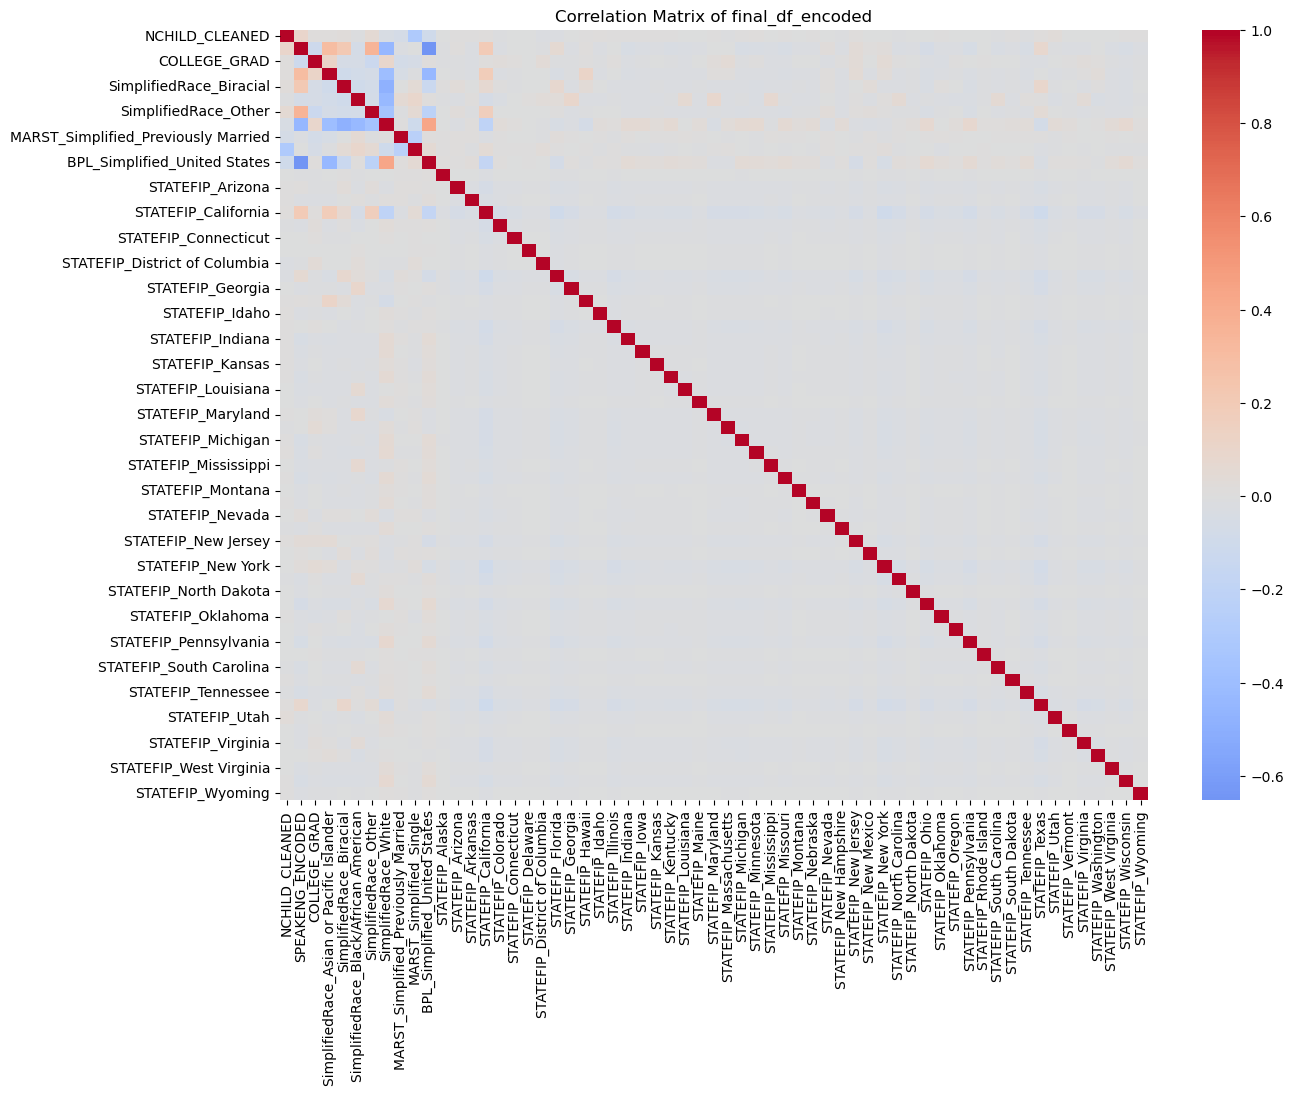

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title("Correlation Matrix of final_df_encoded")
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define target and features
X = final_df_encoded.drop(columns=['COLLEGE_GRAD'])
y = final_df_encoded['COLLEGE_GRAD']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## RandomForest

In [55]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [56]:
y_pred = rf.predict(X_test)

print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")


🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.40      0.49     46694
           1       0.61      0.80      0.69     53779

    accuracy                           0.61    100473
   macro avg       0.62      0.60      0.59    100473
weighted avg       0.62      0.61      0.60    100473

✅ Accuracy Score:
0.6144


In [57]:
X_train.shape

(401890, 60)

📉 Using sample of 40189 rows for tuning instead of 401890
🚀 Starting randomized search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.9s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END class_weight=None, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.1s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END class_weight=balanced, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV

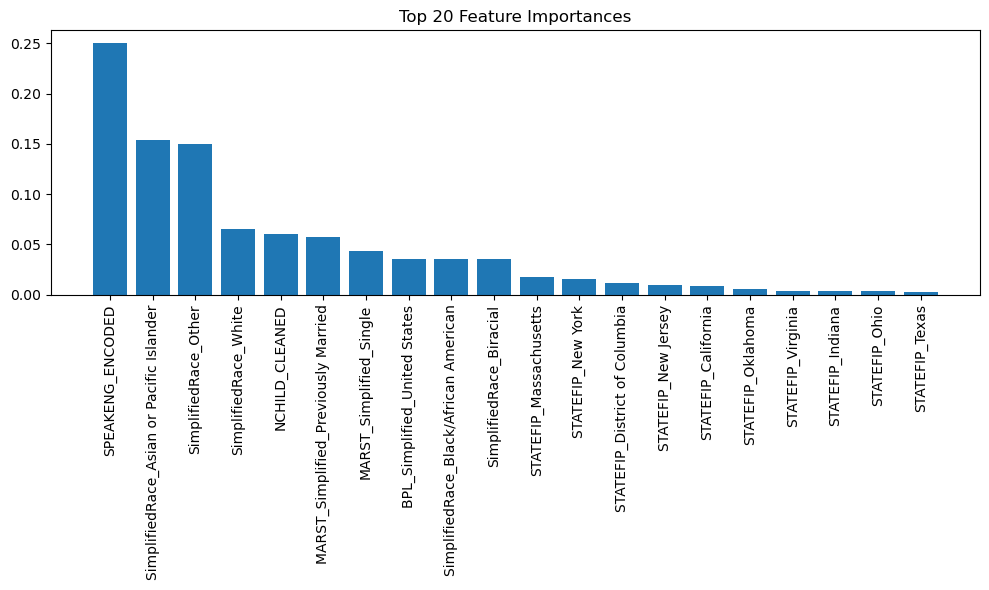

['model.pkl']

In [59]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ---- Step 1: Sample a stratified subsample for tuning ----
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.1,
    stratify=y_train,
    random_state=42
)
print(f"📉 Using sample of {X_sample.shape[0]} rows for tuning instead of {X_train.shape[0]}")

# ---- Step 2: Define search space ----
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', None]
}

# ---- Step 3: Run Randomized Search with 3-Fold Stratified CV ----
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=15,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

start_time = time.time()
print("🚀 Starting randomized search...")
random_search.fit(X_sample, y_sample)
print(f"✅ Search completed in {(time.time() - start_time)/60:.2f} minutes")

# ---- Step 4: Train final model with best parameters ----
best_params = random_search.best_params_
print("\n🏆 Best Parameters:", best_params)

final_rf = RandomForestClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1
)

print("📦 Training final model on full training data...")
start_time = time.time()
final_rf.fit(X_train, y_train)
print(f"✅ Training complete in {(time.time() - start_time)/60:.2f} minutes")

# ---- Step 5: Evaluate with 5-Fold Stratified CV ----
print("\n📊 Cross-validating final model on full training set (5-fold)...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
accuracies = []
aucs = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    final_rf.fit(X_t, y_t)
    y_pred = final_rf.predict(X_v)
    y_proba = final_rf.predict_proba(X_v)[:, 1]

    f1 = f1_score(y_v, y_pred)
    acc = accuracy_score(y_v, y_pred)
    auc = roc_auc_score(y_v, y_proba)

    f1_scores.append(f1)
    accuracies.append(acc)
    aucs.append(auc)

    print(f"\n📂 Fold {fold}")
    print(f"F1 Score: {f1:.4f} | Accuracy: {acc:.4f} | AUC: {auc:.4f}")

print(f"\n✅ Average CV F1: {np.mean(f1_scores):.4f}")
print(f"✅ Average CV Accuracy: {np.mean(accuracies):.4f}")
print(f"✅ Average CV AUC: {np.mean(aucs):.4f}")

# ---- Step 6: Final Test Set Evaluation ----
y_test_pred = final_rf.predict(X_test)
y_test_proba = final_rf.predict_proba(X_test)[:, 1]

print("\n🧪 Final Test Set Performance:")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# ---- Step 7: Feature Importance ----
importances = final_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X_train.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

# ---- Step 8: Save model (optional) ----
import joblib
joblib.dump(final_rf, 'model.pkl')


In [1]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import gc

# Memory optimization
gc.collect()

# 1. Use a subsample for hyperparameter tuning
# This is essential for making Grid Search viable with large datasets
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.05,  # Use just 5% of training data (smaller than before)
    stratify=y_train,
    random_state=42
)

print(f"Using sample of {X_sample.shape[0]} rows for tuning instead of {X_train.shape[0]}")

# 2. Highly focused parameter grid
# Significantly reduced from original to make Grid Search feasible
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt'],  # Reduced to only one option
    'class_weight': ['balanced']  # Reduced to only one option
}

# This grid has 3×3×2×2×1×1 = 36 combinations instead of 144

# 3. Set up Grid Search with minimal CV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,      # Reduced from standard 5 folds
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# 4. Monitor execution time
start_time = time.time()
print(f"Starting grid search on sample data ({X_sample.shape})...")
grid_search.fit(X_sample, y_sample)
print(f"Search completed in {(time.time() - start_time)/60:.2f} minutes")

# 5. Train final model with best parameters on full training data
print("\nBest parameters found: ", grid_search.best_params_)
best_params = grid_search.best_params_

# Create the final model with best parameters
final_rf = RandomForestClassifier(
    **best_params,  # Unpack the best parameters
    random_state=42,
    n_jobs=-1  # Use all cores for final training
)

# Train on full dataset (free memory before this step)
del X_sample, y_sample
gc.collect()

print("Training final model on full training data...")
start_time = time.time()
final_rf.fit(X_train, y_train)
print(f"Final model training completed in {(time.time() - start_time)/60:.2f} minutes")

# Evaluate on test set
y_pred = final_rf.predict(X_test)
print("\nTest set performance:")
print(f"F1 score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, final_rf.predict_proba(X_test)[:, 1]):.4f}")

# Save the results to analyze
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

# Display top 5 parameter combinations
print("\nTop 5 parameter combinations:")
for i, params in enumerate(results['params'][:5]):
    print(f"\nCombination {i+1} (Score: {results['mean_test_score'][i]:.4f}):")
    for param, value in params.items():
        print(f"- {param}: {value}")

# Feature importance visualization
importances = final_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Get top 20 features (for readability)
plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X_train.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

# Plot the parameter search results for n_estimators and max_depth
param_scores = results.pivot_table(
    index='param_n_estimators',
    columns='param_max_depth',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(param_scores, annot=True, fmt='.4f', cmap='viridis')
plt.title('Grid Search Results: n_estimators vs max_depth')
plt.tight_layout()
plt.show()

# Save the model if needed
# import joblib
# joblib.dump(final_rf, 'model.pkl')

NameError: name 'X_train' is not defined

## AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Initialize AdaBoost with the base estimator
ab = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train on your training data
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
y_pred = ab.predict(X_test)

# Print classification report
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("✅ Accuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")

🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.34      0.44     46694
           1       0.59      0.83      0.69     53779

    accuracy                           0.60    100473
   macro avg       0.61      0.59      0.57    100473
weighted avg       0.61      0.60      0.58    100473

✅ Accuracy Score:
0.6033


📉 Using sample of 40189 rows for tuning instead of 401890
🚀 Starting randomized search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
21 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

✅ Search completed in 0.76 minutes

🏆 Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME'}
📦 Training final model on full training data...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


✅ Training complete in 0.95 minutes

📊 Cross-validating final model on full training set (5-fold)...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



📂 Fold 1
F1 Score: 0.7070 | Accuracy: 0.5781 | AUC: 0.6147


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



📂 Fold 2
F1 Score: 0.7073 | Accuracy: 0.5784 | AUC: 0.6140


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



📂 Fold 3
F1 Score: 0.7087 | Accuracy: 0.5801 | AUC: 0.6156


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



📂 Fold 4
F1 Score: 0.7075 | Accuracy: 0.5787 | AUC: 0.6158


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(



📂 Fold 5
F1 Score: 0.7068 | Accuracy: 0.5773 | AUC: 0.6145

✅ Average CV F1: 0.7074
✅ Average CV Accuracy: 0.5785
✅ Average CV AUC: 0.6149

🧪 Final Test Set Performance:
F1 Score: 0.7074
Accuracy: 0.5790
AUC: 0.6145

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.15      0.25     46694
           1       0.56      0.95      0.71     53779

    accuracy                           0.58    100473
   macro avg       0.64      0.55      0.48    100473
weighted avg       0.64      0.58      0.49    100473



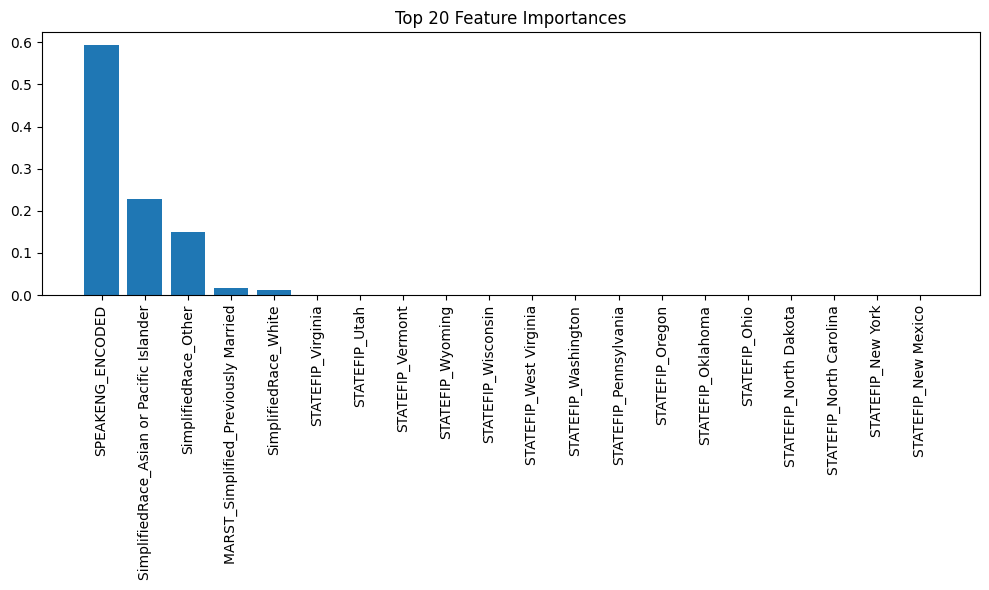

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ---- Step 1: Sample a stratified subsample for tuning ----
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.1,
    stratify=y_train,
    random_state=42
)
print(f"📉 Using sample of {X_sample.shape[0]} rows for tuning instead of {X_train.shape[0]}")

# ---- Step 2: Define search space ----
param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R']  # AdaBoost has two algorithm options
}

# ---- Step 3: Run Randomized Search with 3-Fold Stratified CV ----
ada_boost = AdaBoostClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=ada_boost,
    param_distributions=param_distributions,
    n_iter=15,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

start_time = time.time()
print("🚀 Starting randomized search...")
random_search.fit(X_sample, y_sample)
print(f"✅ Search completed in {(time.time() - start_time)/60:.2f} minutes")

# ---- Step 4: Train final model with best parameters ----
best_params = random_search.best_params_
print("\n🏆 Best Parameters:", best_params)

final_ada_boost = AdaBoostClassifier(
    **best_params,
    random_state=42
)

print("📦 Training final model on full training data...")
start_time = time.time()
final_ada_boost.fit(X_train, y_train)
print(f"✅ Training complete in {(time.time() - start_time)/60:.2f} minutes")

# ---- Step 5: Evaluate with 5-Fold Stratified CV ----
print("\n📊 Cross-validating final model on full training set (5-fold)...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
accuracies = []
aucs = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    final_ada_boost.fit(X_t, y_t)
    y_pred = final_ada_boost.predict(X_v)
    y_proba = final_ada_boost.predict_proba(X_v)[:, 1]

    f1 = f1_score(y_v, y_pred)
    acc = accuracy_score(y_v, y_pred)
    auc = roc_auc_score(y_v, y_proba)

    f1_scores.append(f1)
    accuracies.append(acc)
    aucs.append(auc)

    print(f"\n📂 Fold {fold}")
    print(f"F1 Score: {f1:.4f} | Accuracy: {acc:.4f} | AUC: {auc:.4f}")

print(f"\n✅ Average CV F1: {np.mean(f1_scores):.4f}")
print(f"✅ Average CV Accuracy: {np.mean(accuracies):.4f}")
print(f"✅ Average CV AUC: {np.mean(aucs):.4f}")

# ---- Step 6: Final Test Set Evaluation ----
y_test_pred = final_ada_boost.predict(X_test)
y_test_proba = final_ada_boost.predict_proba(X_test)[:, 1]

print("\n🧪 Final Test Set Performance:")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# ---- Step 7: Feature Importance ----
importances = final_ada_boost.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X_train.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

# ---- Step 8: Save model (optional) ----
# import joblib
# joblib.dump(final_ada_boost, 'best_ada_boost_model.pkl')

Using sample of 20094 rows for tuning instead of 401890
Starting grid search on sample data ((20094, 60))...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Search completed in 0.54 minutes

Best parameters found:  {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}
Training final model on full training data...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Final model training completed in 0.94 minutes

Test set performance:
F1 score: 0.7074
Accuracy: 0.5790
AUC: 0.6144

Top 5 parameter combinations:

Combination 1 (Score: 0.7026):
- algorithm: SAMME
- learning_rate: 0.1
- n_estimators: 200

Combination 2 (Score: 0.7063):
- algorithm: SAMME
- learning_rate: 0.1
- n_estimators: 50

Combination 3 (Score: 0.7063):
- algorithm: SAMME
- learning_rate: 0.2
- n_estimators: 50

Combination 4 (Score: 0.7071):
- algorithm: SAMME
- learning_rate: 0.1
- n_estimators: 100

Combination 5 (Score: 0.7065):
- algorithm: SAMME
- learning_rate: 0.01
- n_estimators: 100


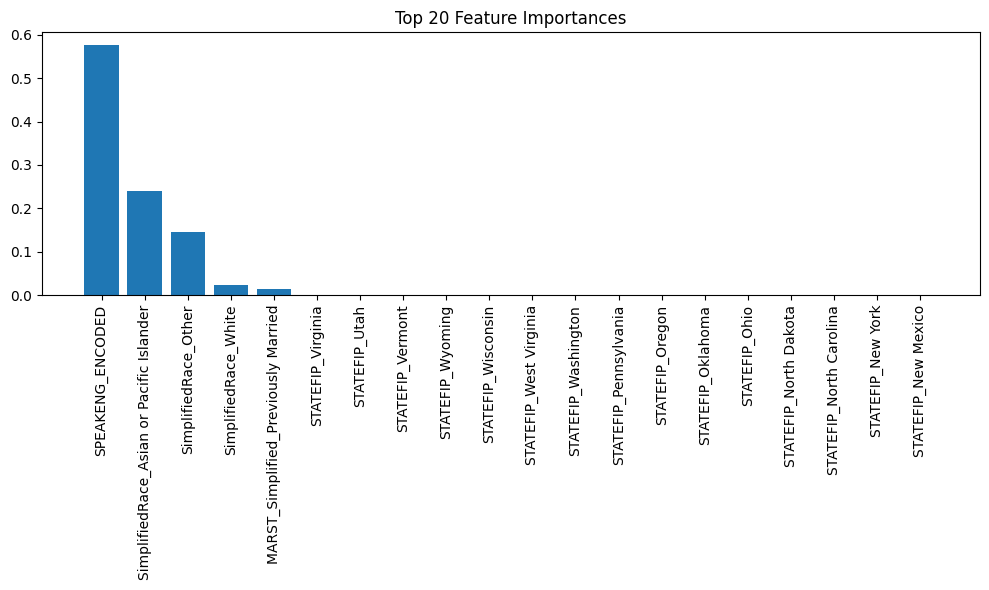

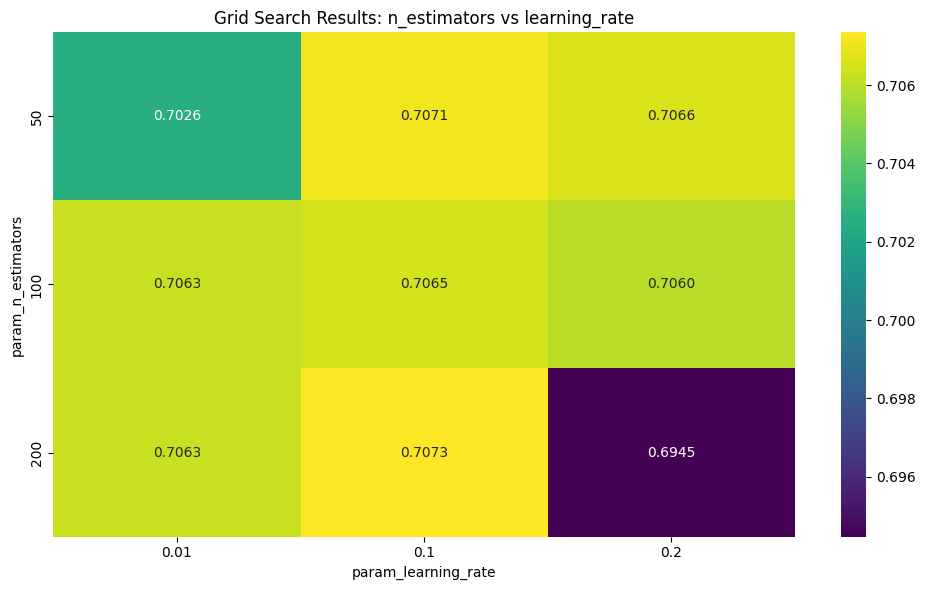

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import gc

# Memory optimization
gc.collect()

# 1. Use a subsample for hyperparameter tuning
# This is essential for making Grid Search viable with large datasets
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.05,  # Use just 5% of training data (smaller than before)
    stratify=y_train,
    random_state=42
)

print(f"Using sample of {X_sample.shape[0]} rows for tuning instead of {X_train.shape[0]}")

# 2. Highly focused parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'algorithm': ['SAMME', 'SAMME.R']  # AdaBoost has two algorithm options
}

# 3. Set up Grid Search with minimal CV
ada_boost = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=ada_boost,
    param_grid=param_grid,
    cv=3,      # Reduced from standard 5 folds
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# 4. Monitor execution time
start_time = time.time()
print(f"Starting grid search on sample data ({X_sample.shape})...")
grid_search.fit(X_sample, y_sample)
print(f"Search completed in {(time.time() - start_time)/60:.2f} minutes")

# 5. Train final model with best parameters on full training data
print("\nBest parameters found: ", grid_search.best_params_)
best_params = grid_search.best_params_

# Create the final model with best parameters
final_ada_boost = AdaBoostClassifier(
    **best_params,  # Unpack the best parameters
    random_state=42
)

# Train on full dataset (free memory before this step)
del X_sample, y_sample
gc.collect()

print("Training final model on full training data...")
start_time = time.time()
final_ada_boost.fit(X_train, y_train)
print(f"Final model training completed in {(time.time() - start_time)/60:.2f} minutes")

# Evaluate on test set
y_pred = final_ada_boost.predict(X_test)
print("\nTest set performance:")
print(f"F1 score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, final_ada_boost.predict_proba(X_test)[:, 1]):.4f}")

# Save the results to analyze
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

# Display top 5 parameter combinations
print("\nTop 5 parameter combinations:")
for i, params in enumerate(results['params'][:5]):
    print(f"\nCombination {i+1} (Score: {results['mean_test_score'][i]:.4f}):")
    for param, value in params.items():
        print(f"- {param}: {value}")

# Feature importance visualization
importances = final_ada_boost.feature_importances_
indices = np.argsort(importances)[::-1]

# Get top 20 features (for readability)
plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X_train.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

# Plot the parameter search results for n_estimators and learning_rate
param_scores = results.pivot_table(
    index='param_n_estimators',
    columns='param_learning_rate',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(param_scores, annot=True, fmt='.4f', cmap='viridis')
plt.title('Grid Search Results: n_estimators vs learning_rate')
plt.tight_layout()
plt.show()

# Save the model if needed
# import joblib
# joblib.dump(final_ada_boost, 'best_ada_boost_model.pkl')


## XGBoost

📉 Using sample of 40189 rows for tuning instead of 401890
🚀 Starting randomized search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Search completed in 0.45 minutes

🏆 Best Parameters: {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.01, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
📦 Training final model on full training data...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Training complete in 0.07 minutes

📊 Cross-validating final model on full training set (5-fold)...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📂 Fold 1
F1 Score: 0.7081 | Accuracy: 0.6007 | AUC: 0.6612


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📂 Fold 2
F1 Score: 0.7078 | Accuracy: 0.6002 | AUC: 0.6614


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📂 Fold 3
F1 Score: 0.7090 | Accuracy: 0.6023 | AUC: 0.6615


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📂 Fold 4
F1 Score: 0.7087 | Accuracy: 0.6009 | AUC: 0.6605


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📂 Fold 5
F1 Score: 0.7086 | Accuracy: 0.6027 | AUC: 0.6609

✅ Average CV F1: 0.7084
✅ Average CV Accuracy: 0.6014
✅ Average CV AUC: 0.6611

🧪 Final Test Set Performance:
F1 Score: 0.7080
Accuracy: 0.6023
AUC: 0.6597

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.26      0.38     46694
           1       0.58      0.90      0.71     53779

    accuracy                           0.60    100473
   macro avg       0.64      0.58      0.54    100473
weighted avg       0.63      0.60      0.55    100473



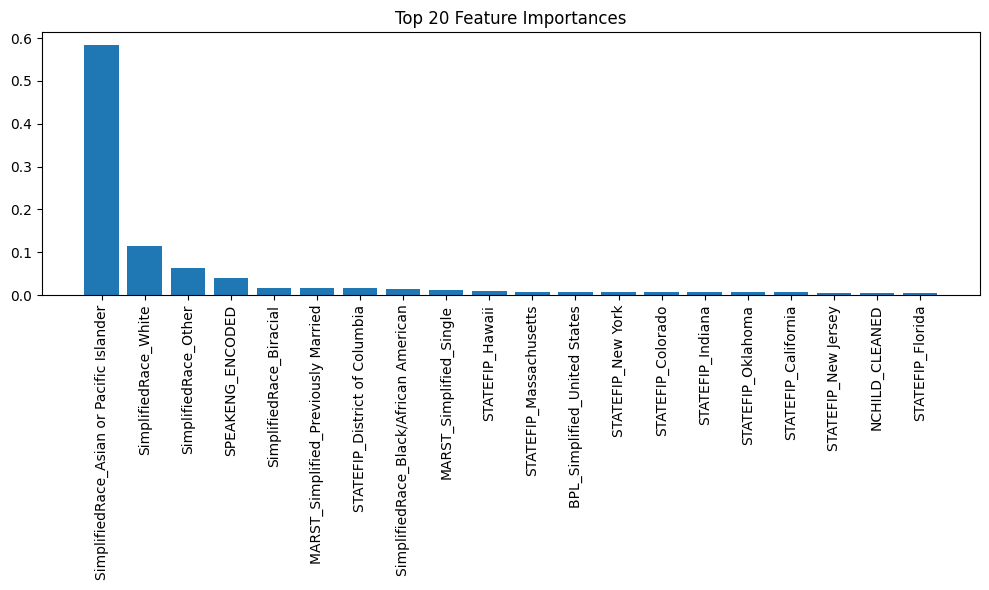

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# ---- Step 1: Sample a stratified subsample for tuning ----
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.1,
    stratify=y_train,
    random_state=42
)
print(f"📉 Using sample of {X_sample.shape[0]} rows for tuning instead of {X_train.shape[0]}")

# ---- Step 2: Define search space ----
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0]
}

# ---- Step 3: Run Randomized Search with 3-Fold Stratified CV ----
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=15,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

start_time = time.time()
print("🚀 Starting randomized search...")
random_search.fit(X_sample, y_sample)
print(f"✅ Search completed in {(time.time() - start_time)/60:.2f} minutes")

# ---- Step 4: Train final model with best parameters ----
best_params = random_search.best_params_
print("\n🏆 Best Parameters:", best_params)

final_xgb = XGBClassifier(
    **best_params,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

print("📦 Training final model on full training data...")
start_time = time.time()
final_xgb.fit(X_train, y_train)
print(f"✅ Training complete in {(time.time() - start_time)/60:.2f} minutes")

# ---- Step 5: Evaluate with 5-Fold Stratified CV ----
print("\n📊 Cross-validating final model on full training set (5-fold)...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []
accuracies = []
aucs = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_t, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_t, y_v = y_train.iloc[train_idx], y_train.iloc[val_idx]

    final_xgb.fit(X_t, y_t)
    y_pred = final_xgb.predict(X_v)
    y_proba = final_xgb.predict_proba(X_v)[:, 1]

    f1 = f1_score(y_v, y_pred)
    acc = accuracy_score(y_v, y_pred)
    auc = roc_auc_score(y_v, y_proba)

    f1_scores.append(f1)
    accuracies.append(acc)
    aucs.append(auc)

    print(f"\n📂 Fold {fold}")
    print(f"F1 Score: {f1:.4f} | Accuracy: {acc:.4f} | AUC: {auc:.4f}")

print(f"\n✅ Average CV F1: {np.mean(f1_scores):.4f}")
print(f"✅ Average CV Accuracy: {np.mean(accuracies):.4f}")
print(f"✅ Average CV AUC: {np.mean(aucs):.4f}")

# ---- Step 6: Final Test Set Evaluation ----
y_test_pred = final_xgb.predict(X_test)
y_test_proba = final_xgb.predict_proba(X_test)[:, 1]

print("\n🧪 Final Test Set Performance:")
print(f"F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_test_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# ---- Step 7: Feature Importance ----
importances = final_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X_train.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

# ---- Step 8: Save model (optional) ----
# import joblib
# joblib.dump(final_xgb, 'best_xgb_model.pkl')


Using sample of 20094 rows for tuning instead of 401890
Starting grid search on sample data ((20094, 60))...
Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Search completed in 111.72 minutes

Best parameters found:  {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 1.0, 'subsample': 0.8}
Training final model on full training data...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:31:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final model training completed in 0.09 minutes

Test set performance:
F1 score: 0.7078
Accuracy: 0.5947
AUC: 0.6518

Top 5 parameter combinations:

Combination 1 (Score: 0.7069):
- colsample_bytree: 0.7
- gamma: 0
- learning_rate: 0.01
- max_depth: 6
- n_estimators: 50
- reg_alpha: 0.1
- reg_lambda: 1.0
- subsample: 0.8

Combination 2 (Score: 0.7068):
- colsample_bytree: 0.7
- gamma: 0.1
- learning_rate: 0.01
- max_depth: 6
- n_estimators: 50
- reg_alpha: 0.1
- reg_lambda: 1.0
- subsample: 0.8

Combination 3 (Score: 0.7068):
- colsample_bytree: 0.7
- gamma: 0
- learning_rate: 0.01
- max_depth: 6
- n_estimators: 50
- reg_alpha: 0.01
- reg_lambda: 1.0
- subsample: 1.0

Combination 4 (Score: 0.7067):
- colsample_bytree: 0.7
- gamma: 0.1
- learning_rate: 0.01
- max_depth: 6
- n_estimators: 50
- reg_alpha: 0
- reg_lambda: 1.0
- subsample: 0.8

Combination 5 (Score: 0.7068):
- colsample_bytree: 0.7
- gamma: 0
- learning_rate: 0.01
- max_depth: 6
- n_estimators: 50
- reg_alpha: 0.01
- reg_lam

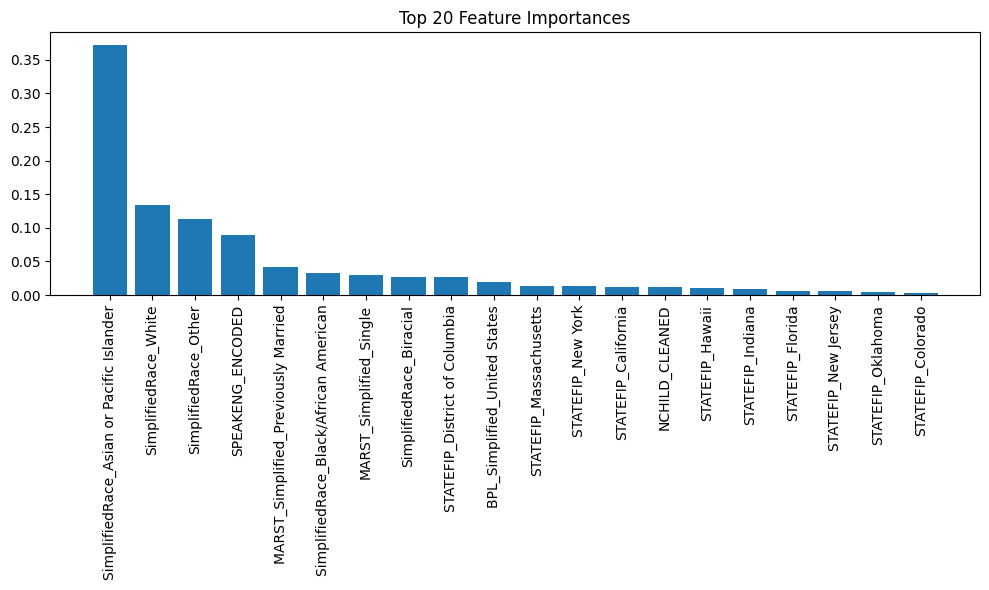

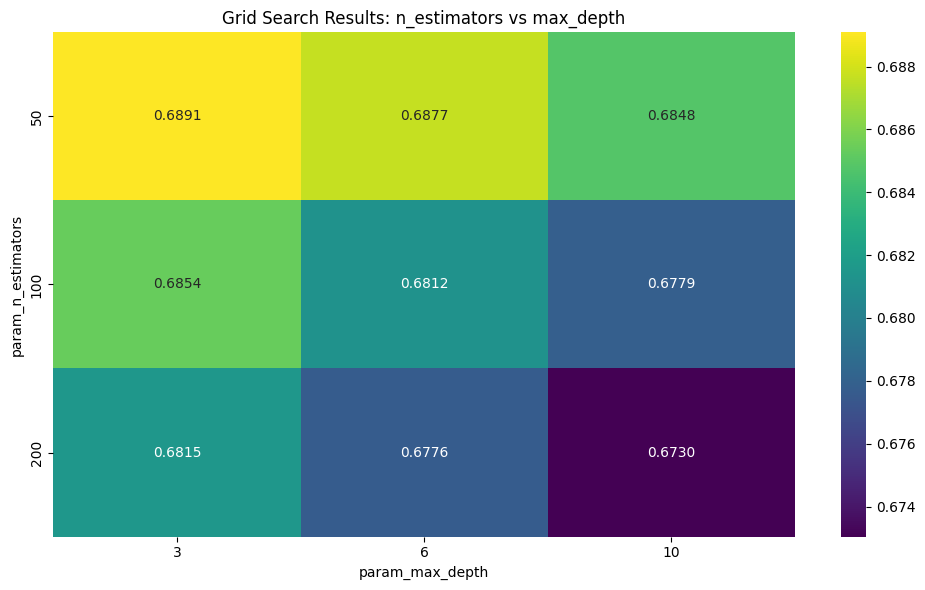

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import gc

# Memory optimization
gc.collect()

# 1. Use a subsample for hyperparameter tuning
# This is essential for making Grid Search viable with large datasets
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train,
    train_size=0.05,  # Use just 5% of training data (smaller than before)
    stratify=y_train,
    random_state=42
)

print(f"Using sample of {X_sample.shape[0]} rows for tuning instead of {X_train.shape[0]}")

# 2. Highly focused parameter grid
# Significantly reduced from original to make Grid Search feasible
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1.0, 10.0]
}

# This grid has 3×3×3×3×3×3×3 = 2187 combinations (still feasible)

# 3. Set up Grid Search with minimal CV
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,      # Reduced from standard 5 folds
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# 4. Monitor execution time
start_time = time.time()
print(f"Starting grid search on sample data ({X_sample.shape})...")
grid_search.fit(X_sample, y_sample)
print(f"Search completed in {(time.time() - start_time)/60:.2f} minutes")

# 5. Train final model with best parameters on full training data
print("\nBest parameters found: ", grid_search.best_params_)
best_params = grid_search.best_params_

# Create the final model with best parameters
final_xgb = XGBClassifier(
    **best_params,  # Unpack the best parameters
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train on full dataset (free memory before this step)
del X_sample, y_sample
gc.collect()

print("Training final model on full training data...")
start_time = time.time()
final_xgb.fit(X_train, y_train)
print(f"Final model training completed in {(time.time() - start_time)/60:.2f} minutes")

# Evaluate on test set
y_pred = final_xgb.predict(X_test)
print("\nTest set performance:")
print(f"F1 score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, final_xgb.predict_proba(X_test)[:, 1]):.4f}")

# Save the results to analyze
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='rank_test_score')

# Display top 5 parameter combinations
print("\nTop 5 parameter combinations:")
for i, params in enumerate(results['params'][:5]):
    print(f"\nCombination {i+1} (Score: {results['mean_test_score'][i]:.4f}):")
    for param, value in params.items():
        print(f"- {param}: {value}")

# Feature importance visualization
importances = final_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

# Get top 20 features (for readability)
plt.figure(figsize=(10, 6))
plt.title('Top 20 Feature Importances')
plt.bar(range(20), importances[indices][:20], align='center')
plt.xticks(range(20), X_train.columns[indices][:20], rotation=90)
plt.tight_layout()
plt.show()

# Plot the parameter search results for n_estimators and max_depth
param_scores = results.pivot_table(
    index='param_n_estimators',
    columns='param_max_depth',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(param_scores, annot=True, fmt='.4f', cmap='viridis')
plt.title('Grid Search Results: n_estimators vs max_depth')
plt.tight_layout()
plt.show()

# Save the model if needed
# import joblib
# joblib.dump(final_xgb, 'best_xgb_model.pkl')
